In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#set color
sns.set_palette("Set2")

In [2]:
df = pd.read_csv("AppleStore.csv")
df_desc = pd.read_csv("appleStore_description.csv")

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
# dropping duplicated value
df.drop(df.index[df.track_name.duplicated()], inplace=True)

In [5]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
df_desc.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


/Users/ayim/Desktop/virenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


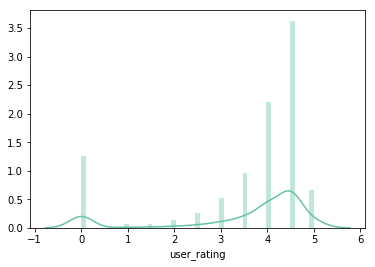

In [7]:
# Look at target first - user_rating - the disrbition
# There are some zeros...maybe no rating for these apps?

sns.distplot(df.user_rating)

In [8]:
len(df[df.rating_count_tot == 0])

929

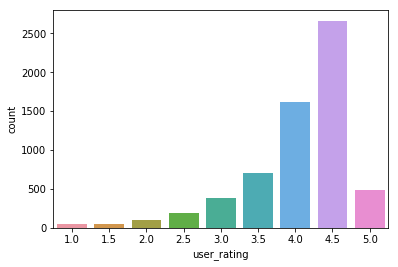

In [9]:
# Look at dist again after removing them
df.drop(df.index[df.rating_count_tot == 0], inplace=True)
# Since its ordinal let's use count plot instead
# sns.distplot(df.user_rating)
sns.countplot(df.user_rating)
# no more zeros now

/Users/ayim/Desktop/virenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


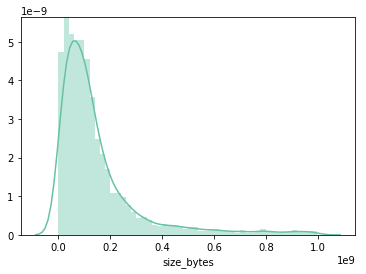

In [10]:
# Size of the apps 
# It's super positively skewed, i want to bin it to greater than 1
sns.distplot(df[df.size_bytes < 1000000000].size_bytes)

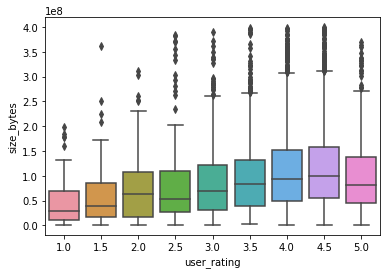

In [11]:
# how the sizes of the app affect rating?
# a general positive trend? funny
sns.boxplot(x='user_rating', y='size_bytes', 
           data=df[df.size_bytes < 400000000])

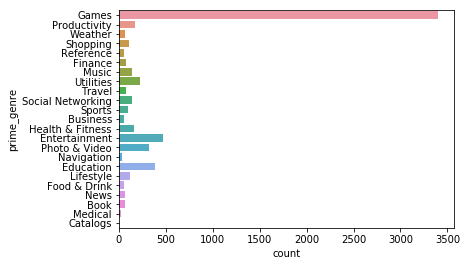

In [12]:
# the genres of the apps?
sns.countplot(y= df["prime_genre"])

/Users/ayim/Desktop/virenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


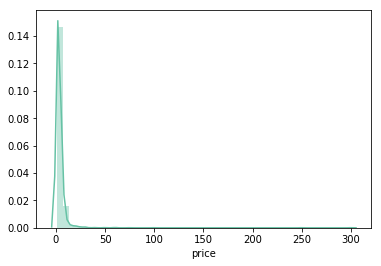

In [13]:
# The price of the app?
# lots of zeros, split into two groups, check paid app dist only
sns.distplot(df[df.price > 0].price)
# positively skewed? let's bin them

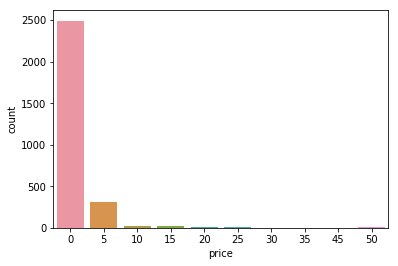

In [14]:
sns.countplot(df[df.price > 0].price.apply(lambda x: math.floor(x/5)*5 if x < 50 else 50 ))
#overwhelmingly less than 5

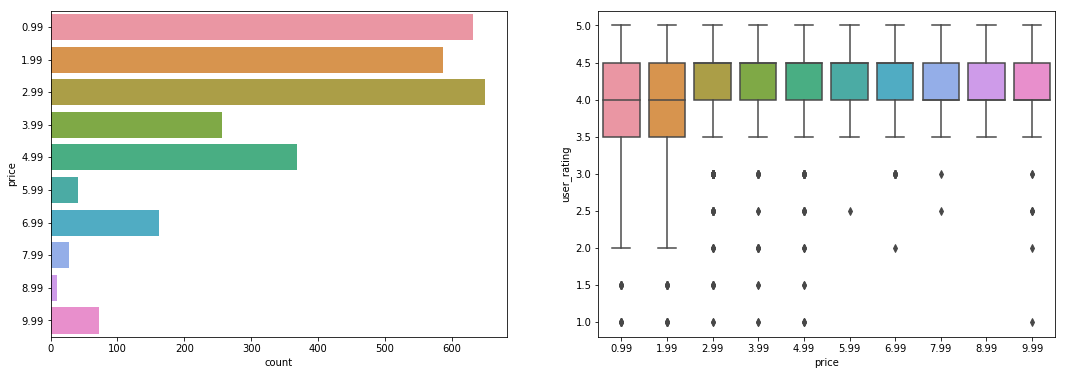

In [15]:
# seems they have a fixed price of x.99
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(y=df[(df.price<10) & (df.price > 0)].price, ax=ax1)
sns.boxplot(x="price", y="user_rating", data=df[(df.price<10) & (df.price > 0)], ax=ax2)

# looks like users are less likely to give a low rating if they paid more?

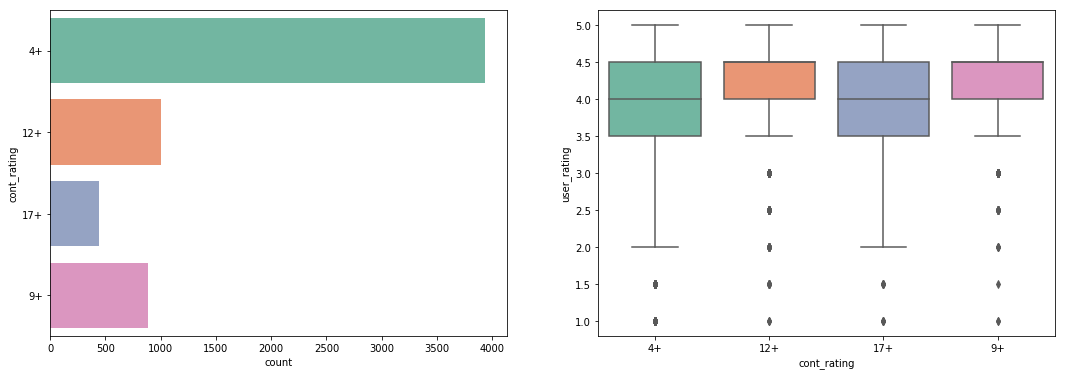

In [16]:
# what about cont_rating? is it related to user rating?
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(y=df.cont_rating, ax=ax1)
sns.boxplot(x="cont_rating", y="user_rating", data=df, ax=ax2)

In [17]:
# Let's look at top apps
df.sort_values('user_rating', ascending=False).head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7196,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1
6253,1119514051,"PS Deals+ - Games Price Alerts for PS4, PS3, Vita",70203392,USD,2.99,28,6,5.0,4.5,2.2.1,9+,News,37,5,2,1
6274,1120936238,Cafe Story - Play Cooking & Farming Game,116981760,USD,0.00,1498,79,5.0,5.0,1.1.55,4+,Games,38,5,2,1
855,444745181,Daily Audio Bible App,13282304,USD,0.99,796,0,5.0,0.0,4.6.0,4+,Lifestyle,37,3,5,1
4719,1058287503,酷我音乐HD-无损在线播放,40784896,USD,0.00,1340,264,5.0,5.0,4.0.6,4+,Entertainment,24,5,1,1


[Text(0.5,1,'All apps')]

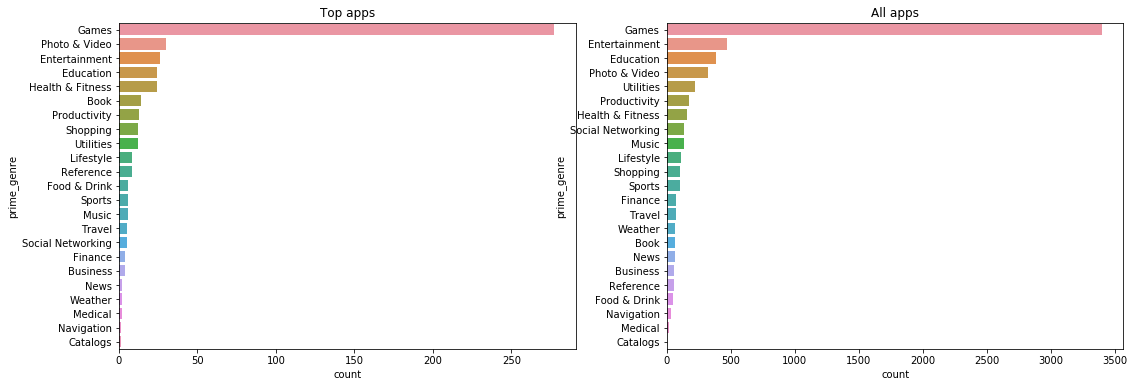

In [18]:
# Maybe we could look ONLY at the top ads? compare with others?
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(y= df[df.user_rating == 5]["prime_genre"], ax=ax1, order = df[df.user_rating == 5]["prime_genre"].value_counts().index)
sns.countplot(y= df["prime_genre"], ax=ax2, order=df["prime_genre"].value_counts().index)
ax1.set(title="Top apps")
ax2.set(title="All apps")

# Games do even better in top apps!
# photos app are also receieving more high ratings

[Text(0.5,1,'All apps')]

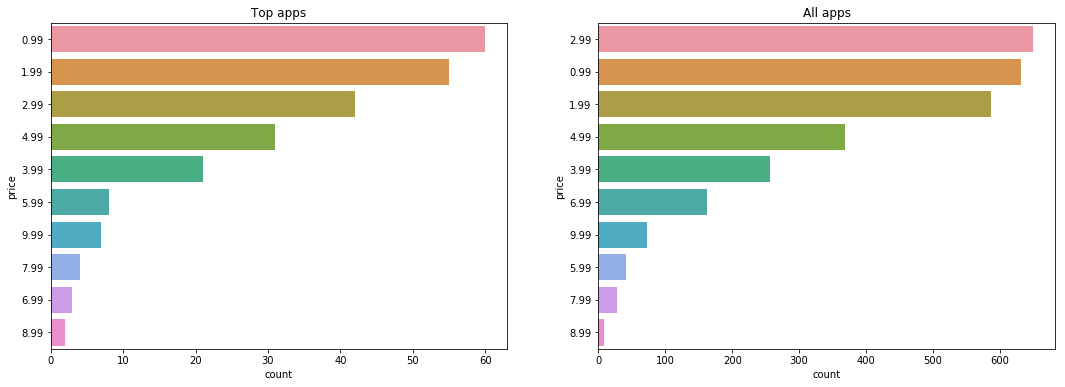

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.countplot(y= df[(df.price<10) & (df.price > 0) & (df.user_rating == 5)].price, ax=ax1, order = df[(df.price<10) & (df.price > 0)& (df.user_rating == 5)].price.value_counts().index)
sns.countplot(y= df[(df.price<10) & (df.price > 0)].price, ax=ax2, order=df[(df.price<10) & (df.price > 0)].price.value_counts().index)
ax1.set(title="Top apps")
ax2.set(title="All apps")

# though cheap apps are less likely to receive poor ratings
# they are on the other hand could receive good ratings easier

In [19]:
# Maybe we could look at the description of these top apps?
merged = pd.merge(df, df_desc, on="id")

In [20]:
# extract the desc for all top apps (rating == 5) and concat their desc
rep = "\n|\'|\*"
desc_text = merged[merged['user_rating']==5].app_desc.str.replace(rep,"").tolist()

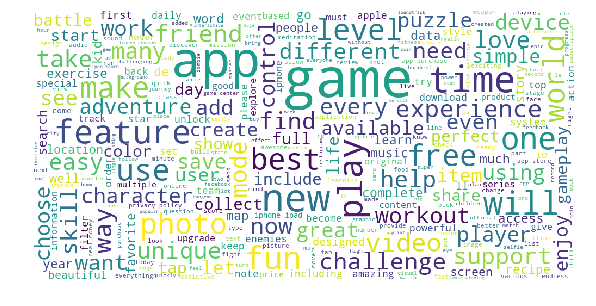

In [21]:
import wordcloud
alltext = ' '.join(desc_text).lower()
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=300,
                            relative_scaling=.5).generate(alltext)
plt.figure(figsize=(10,5))
plt.axis('off')
# plt.savefig('allsongs.png')
plt.imshow(cloud);

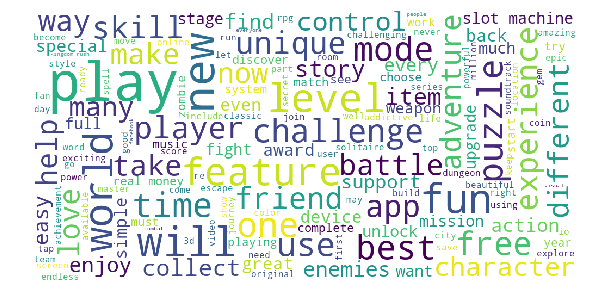

In [36]:
# What about only games?
rep = "\n|\'|\*|game"
desc_text = merged[(merged['user_rating']==5) & (merged['prime_genre']=="Games")].app_desc
desc_text = desc_text.apply(lambda x : x.lower())
desc_text = desc_text.str.replace(rep,"").tolist()

alltext = ' '.join(desc_text)
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=150,
                            relative_scaling=.5).generate(alltext)
plt.figure(figsize=(10,5))
plt.axis('off')
# plt.savefig('allsongs.png')
plt.imshow(cloud);

# People like challenges. Free is attractive too

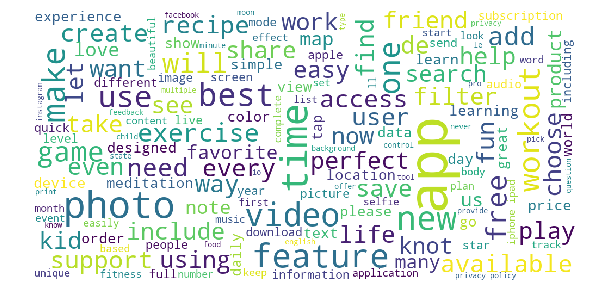

In [37]:
# What about non-games
rep = "\n|\'|\*"
desc_text = merged[(merged['user_rating']==5) & (merged['prime_genre']!="Games")].app_desc
desc_text = desc_text.apply(lambda x : x.lower())
desc_text = desc_text.str.replace(rep,"").tolist()

alltext = ' '.join(desc_text)
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=150,
                            relative_scaling=.5).generate(alltext)
plt.figure(figsize=(10,5))
plt.axis('off')
# plt.savefig('allsongs.png')
plt.imshow(cloud);

# Photos and videos are attractive stuff